## Support Vector Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[-0.17196194, -0.41865592],
       [ 0.4119458 ,  0.44132763],
       [-1.00903141,  0.85473127],
       ...,
       [-1.1979981 ,  0.13012221],
       [ 1.14670031, -1.25852466],
       [ 0.47503874, -0.41441157]])

In [5]:
y

array([-2.61334238e+01,  4.03614021e+01, -1.51683119e+01,  3.02516945e-01,
       -1.17916737e+01, -3.27618498e+01, -2.27037008e+01,  1.50031952e+01,
        1.64374060e+02,  1.26732817e+01,  1.45807338e+01,  6.72931956e+01,
       -2.36365133e+01, -3.13774905e+01,  9.55061430e+01,  8.12469084e+00,
       -1.02632244e+01,  3.48368353e+00, -2.21377696e+01,  9.02007857e+01,
       -6.38137047e+01, -5.16506610e+01,  1.99798726e+01,  7.09762681e+01,
       -9.37489482e+01,  9.03018552e+01,  4.58175143e+01, -9.81793200e+01,
        3.67633328e+01,  1.02195256e+02, -1.21977623e+02, -6.02601921e+01,
       -3.07250636e+01, -5.08443619e+01, -8.31821257e+01, -6.20021414e+01,
       -6.00866969e+01,  4.28495787e+01, -2.42597240e+00,  7.18146225e+00,
       -4.20173342e+01,  7.55461361e+01, -5.94679480e+01,  2.85681737e+01,
       -1.03798996e+02, -8.84293817e+01, -9.79966058e+01, -7.22445417e+01,
       -5.89275683e+01,  1.46974798e+02, -1.33518697e+01,  1.15431481e+02,
        3.31072574e+01,  

In [6]:
pd.DataFrame(X)[0]

0     -0.171962
1      0.411946
2     -1.009031
3     -0.256254
4      0.421512
         ...   
995   -0.136729
996   -0.656878
997   -1.197998
998    1.146700
999    0.475039
Name: 0, Length: 1000, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='0', ylabel='1'>

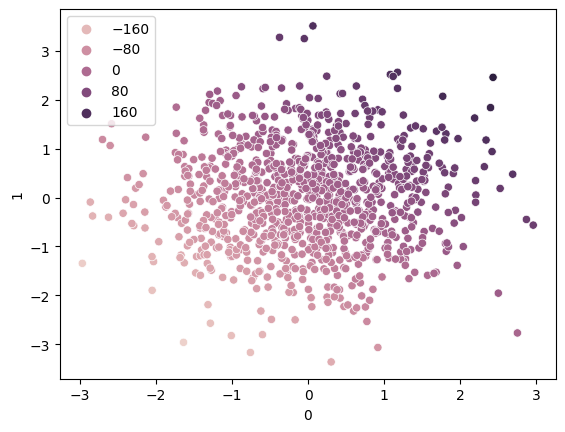

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr=SVR(kernel='linear')

In [11]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[46.88057235, 43.81589945]])

In [13]:
## Prediction
y_pred=svr.predict(X_test)

In [14]:
y_pred

array([  -6.22787295,  113.6634879 ,   27.16273599,  -61.84342676,
        -53.15778333,   75.01845196,   52.84083423,   28.00213863,
         66.58482072,   11.94819166,  -75.74177443, -124.99845912,
        -24.79616538,   19.59749535,   -8.69768949,  -12.29204994,
       -133.10199739,  111.24070789,  -12.79408535,    3.18364329,
         -3.93599454,   12.25988567,  -50.87146276,   67.97446776,
         12.48093969,  -10.09102336,  -22.69438225,    9.35220107,
         31.58346208,  -34.46688018,  -47.58684759,   10.65558326,
         -0.63210053,  113.59273396,  -24.01982885,  -29.46022721,
         11.86272373,   86.08083869,   73.1194817 ,    8.9086891 ,
        -30.12419353,   32.95928577,  -38.71999607,  -62.64994676,
         16.62277354,   60.10299383,   20.10915248,  152.5792463 ,
        -31.97275986,   68.36335987,  -98.22305849,  156.37399838,
         55.53360359,   17.92745251,    4.77404647,   25.78014481,
         39.36985352,  -37.39205021,  -46.33927283,   24.34811

In [15]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test,y_pred))

0.997810761987021


## Hyperparametere Tuning With SVR

In [17]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [18]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [19]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.940 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.943 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.928 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.921 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.930 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.940 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.943 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.928 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.921 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.930 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 1000, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [21]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9978162261146623


In [22]:
svr.coef_

array([[46.88057235, 43.81589945]])